<a href="https://colab.research.google.com/github/mayur7garg/Superpermutation_Analysis/blob/main/Superpermutations_GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from itertools import permutations
from random import sample, choices, randint, random
from matplotlib import pyplot as plt

In [2]:
class SuperPerm_GA():
    
    def __init__(self, n, population_size, elitism, mutation, repeated_mutations = True, weighted_selection = False, weights_multiplier = 1000):
        self.n = n
        self.population_size = population_size
        self.elitism = elitism
        self.mutation = mutation
        self.repeated_mutations = repeated_mutations
        self.weighted_selection = weighted_selection
        self.weights_multiplier = weights_multiplier
        self.current_generation = 0

        chars = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
        self.perms = list(permutations(chars[:n]))
        self.perms = [''.join(j) for j in self.perms]
        self.total_perms = len(self.perms)
    
        base_DNA = [i for i in range(self.total_perms)]
        self.population = [[base_DNA[0]] + sample(base_DNA[1:], self.total_perms - 1) for i in range(self.population_size)]

        self.scores = self.get_population_scores()
        self.best_scores_per_generation = [self.scores[0][0]]

    def join_perms(self, a, b):
        for i in range(self.n - 1, 0, -1):
            if a[-i:] == b [:i]:
                return a + b[i:]
        return a + b

    def get_superperm(self, dna):
        superperm = self.perms[dna[0]]
        for gene in dna[1:]:
            superperm = self.join_perms(superperm, self.perms[gene])
        return superperm

    def get_dna_score(self, id):
        superperm = self.get_superperm(self.population[id])
        return (len(superperm), id)
    
    def get_population_scores(self):
        return sorted(list(map(self.get_dna_score, range(self.population_size))))

    def get_dna_weights(self):
        return [int(self.weights_multiplier/score[0]) for score in self.scores]
    
    def crossover(self, first_dna, second_dna):
        r = randint(0, self.total_perms)
        child_dna = first_dna[:r]
        for gene in second_dna:
            if gene not in child_dna:
                child_dna.append(gene)
        return child_dna
    
    def mutate(self, dna):
        r = random()
        while r < self.mutation:
            i = randint(1, len(dna) - 1)
            j = randint(1, len(dna) - 1)
            dna[i], dna[j] = dna[j], dna[i]
            if self.repeated_mutations:
                r = random()
            else:
                break
        return dna
    
    def get_next_generation(self):
        new_population = []
        for i in range(self.elitism):
            j = i
            while j < self.population_size:
                if self.population[self.scores[j][1]] not in new_population:
                    new_population.append(self.population[self.scores[j][1]])
                    break
                else:
                    j = j + 1
        if self.weighted_selection:
            for i in range(self.population_size - len(new_population)):
                new_population.append(self.mutate(self.crossover(*choices(population = self.population, k=2, weights = self.get_dna_weights()))))
        else:
            for i in range(self.population_size - len(new_population)):
                new_population.append(self.mutate(self.crossover(*sample(self.population, 2))))
        return new_population
    
    def iterate_generations(self, generations, print_best_score = True):
        for i in range(generations):
            self.population = self.get_next_generation()
            self.scores = self.get_population_scores()
            self.best_scores_per_generation.append(self.scores[0][0])
            self.current_generation += 1
            if print_best_score:
                print(f"Generation: {self.current_generation} | Best score: {self.scores[0][0]}\n")
    
    def get_best_superperms(self, k):
        superperms = []
        for i in range(k):
            superperms.append(self.get_superperm(self.population[self.scores[i][1]]))
        return superperms
    
    def plot_generation_best_scores(self, start_gen = None, end_gen = None):
        if start_gen is None:
            start_gen = 0
        if end_gen is None:
            end_gen = len(self.best_scores_per_generation)

        count = end_gen - start_gen
        plt.figure(figsize=(12, 8))
        plt.plot(range(start_gen, end_gen), self.best_scores_per_generation[start_gen : end_gen] )
        plt.xticks(list(range(start_gen, end_gen, count // 10)))
        plt.xlabel('Generations')
        plt.ylabel('Length of minimal superpermutation')
        plt.title('Length of minimal superpermutation vs Generation')
        plt.show()

In [3]:
ga = SuperPerm_GA(5, 1000, 100, 0.2)

In [4]:
ga.iterate_generations(100)

Generation: 1 | Best score: 518

Generation: 2 | Best score: 518

Generation: 3 | Best score: 518

Generation: 4 | Best score: 510

Generation: 5 | Best score: 510

Generation: 6 | Best score: 510

Generation: 7 | Best score: 510

Generation: 8 | Best score: 510

Generation: 9 | Best score: 507

Generation: 10 | Best score: 507

Generation: 11 | Best score: 505

Generation: 12 | Best score: 505

Generation: 13 | Best score: 505

Generation: 14 | Best score: 505

Generation: 15 | Best score: 505

Generation: 16 | Best score: 505

Generation: 17 | Best score: 505

Generation: 18 | Best score: 504

Generation: 19 | Best score: 504

Generation: 20 | Best score: 503

Generation: 21 | Best score: 503

Generation: 22 | Best score: 503

Generation: 23 | Best score: 494

Generation: 24 | Best score: 494

Generation: 25 | Best score: 494

Generation: 26 | Best score: 494

Generation: 27 | Best score: 494

Generation: 28 | Best score: 494

Generation: 29 | Best score: 494

Generation: 30 | Best s

In [5]:
s = ga.get_best_superperms(3)
s[0]

'ABCDEABCADECBEADCADEBADECEDCBAECDBDACEBDCAECDBABCEDACBEADCAEBCDBAECACDBEDACDCEABEBACDBACEDCBEABCDCABEDBECADBCEADECABDEACEDBCABADCEBDCADBECABEDABCEDABCEBADCBAEDCBEBCADCEBDADBEACEDABACDEBACBEDBACDABEBDECADECBDAEBDCDAEBCDAEDBCAEDECBADBCDEACEDBADBECEACDBECDABEDCAEDBEBADCBEDCABCBADEADBCAEADCBDEADCEBACDEBECDABDECDEBACEADBACBDEDACBAEDEBCAEBDEABCABECDCBEDADEBCDBEACDAEBCDBDCEABDEACBDABECADEABDCECABDEACBDAECBDAECDBADBCEBCDAECBDACEBDACEDBACE'

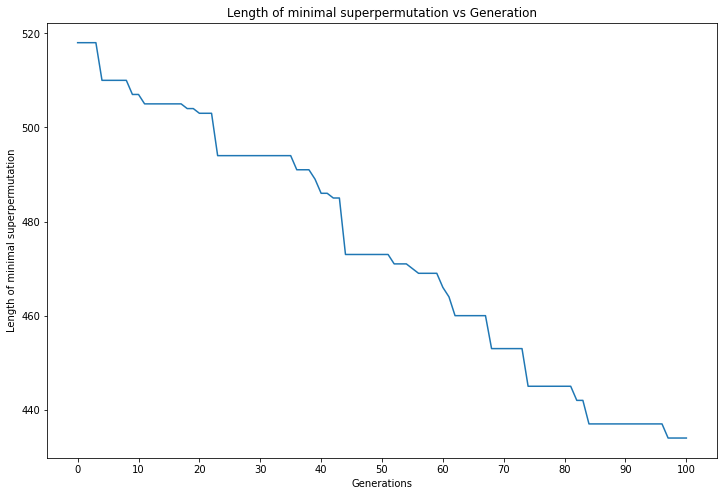

In [6]:
ga.plot_generation_best_scores()

In [7]:
ga.iterate_generations(100)

Generation: 101 | Best score: 433

Generation: 102 | Best score: 433

Generation: 103 | Best score: 433

Generation: 104 | Best score: 430

Generation: 105 | Best score: 430

Generation: 106 | Best score: 430

Generation: 107 | Best score: 430

Generation: 108 | Best score: 430

Generation: 109 | Best score: 430

Generation: 110 | Best score: 430

Generation: 111 | Best score: 427

Generation: 112 | Best score: 427

Generation: 113 | Best score: 427

Generation: 114 | Best score: 424

Generation: 115 | Best score: 424

Generation: 116 | Best score: 424

Generation: 117 | Best score: 424

Generation: 118 | Best score: 424

Generation: 119 | Best score: 424

Generation: 120 | Best score: 424

Generation: 121 | Best score: 424

Generation: 122 | Best score: 424

Generation: 123 | Best score: 424

Generation: 124 | Best score: 424

Generation: 125 | Best score: 422

Generation: 126 | Best score: 422

Generation: 127 | Best score: 422

Generation: 128 | Best score: 422

Generation: 129 | Be

In [8]:
s = ga.get_best_superperms(1)
s[0]

'ABCDEABDACEDCBAECDBCADEACDBEDACAEBDCAEDBCADEBADECDBABCEDACBEADCEDBACAEDBCEDABDCAEBACDBAECDCEABACEDCABEABCDCABEDBECADBCEADECABEDABCBDEACEDBADCEBDCADBECABEDABCEBADCBAEDCBEBCADECBDAECBDAEBCDAEDBCEACDBEACABECDACBEDBACDABEBCAEDECBADBCDEACEADBECEBDABDECAEBDCECDABEDCAEBADCBEACBADEADBCAEADCBDEADCEBACDEBECDABDECDEBACDEBCABDCEABDEACBDEDACBAEDEABCBEDADEBCDBEACDAEBCDABECADEABDCECABDEACBDAECBDAECDBADBCEBCDACEBDACDBACE'

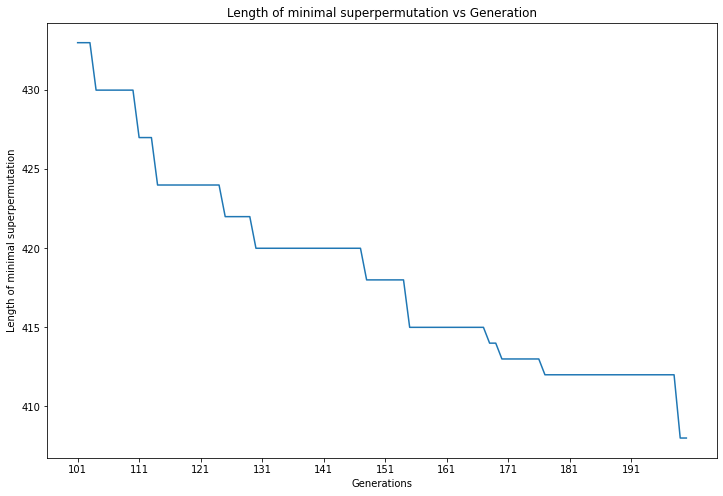

In [9]:
ga.plot_generation_best_scores(101)